In [1]:
from src.environment._ENV_move import Board
from src.agent._AGENT_move import Piece

from src.learn._q_learning_move import Q_learning_move
from src.learn._td import Temporal_difference
from src.learn._td_lambda import Temporal_difference_lambda
from src.learn._policy_iteration import Policy_iteration
from src.learn._exp_td import Expected_temporal_difference
import torch
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Move chess
### Policy iteration

In [2]:
env = Board()
p = Piece(piece='bishop')  # king", "rook", "bishop" or "knight"
r = Policy_iteration(agent=p,env=env)
# r.policy_iteration(k=1,gamma=1,synchronous=True)
# # r.visualize_policy()

# print(r.calculate_cumulative_rewards(num_episodes=100))

aaa = []
for _ in range(10):

    policy_iter_rewards = r.run_episode()
    # r.visualize_policy()
    # r.visualize_action_function()



# print(len(policy_iter_rewards))
print(policy_iter_rewards)


[tensor(-9.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.), tensor(-2.)]


In [13]:
env.reset()
r.visualize_policy()

[['→', '↘', '↘', '↓', '↙', '↘', '↘', '↓'],
 ['↗', '→', '↘', '↘', '↘', '↘', '↘', '↓'],
 ['↗', '↗', '→', '↘', '↘', '↘', '↘', '↓'],
 ['↗', '↗', '↗', '→', '↘', '↘', '↘', '↓'],
 ['↗', '↗', '↗', '↗', '→', '↘', '↘', '↓'],
 ['↘', '↗', '↗', '↗', '↗', '→', '↘', '↓'],
 ['→', '↘', '↗', '↗', '↗', '↗', '→', 'F'],
 ['↗', '→', '↗', '↗', '↗', '↗', '↗', '↑']]


### SARSA temporal difference

In [4]:
env = Board()
p = Piece(piece='bishop')  # king", "rook", "bishop" or "knight"
td = Temporal_difference(p, env)
td_cum_reward = td.sarsa_td(n_episodes=1000, alpha=0.2, gamma=0.9)
td.visualize_policy() # controllare il risultato
# td.visualize_action_function()



[['↘', '↗', '↘', '↗', '↙', '↗', '↘', '↗'],
 ['↗', '↙', '↗', '↗', '↗', '↖', '↗', '↖'],
 ['↘', '↗', '↙', '↗', '↘', '↗', '↙', '↗'],
 ['↗', '↘', '↗', '↙', '↗', '↘', '↗', '↙'],
 ['↙', '↗', '↖', '↗', '↙', '↗', '↖', '↗'],
 ['↗', '↗', '↗', '↘', '↗', '↘', '↗', '↘'],
 ['↗', '↗', '↙', '↗', '↙', '↗', '↘', '↗'],
 ['↗', '↖', '↗', '↖', '↗', '↙', '↗', 'F']]


### Expected SARSA temporal difference

In [4]:
env = Board()
p = Piece(piece='king')  # king", "rook", "bishop" or "knight"
exp_tp = Expected_temporal_difference(agent=p, env=env)
exp_tp.expected_sarsa(n_episodes=1000, alpha=0.2, gamma=0.9)
exp_tp.visualize_policy() # controllare il risultato
exp_tp.visualize_action_function()


[['↘', '↘', '↓', '↓', '↘', '↓', '↑', '→'],
 ['↘', '↘', '←', '→', '↘', '↘', '↙', '↖'],
 ['↓', '→', '↘', '↘', '↘', '↘', '↓', '→'],
 ['↓', '↘', '←', '↘', '↘', '↘', '↗', '→'],
 ['↙', '↑', '↑', '↘', '↘', '↘', '↘', '↓'],
 ['↗', '↘', '↘', '←', '↘', '↘', '↘', '↓'],
 ['↘', '↘', '↘', '→', '→', '↘', '→', 'F'],
 ['↘', '↖', '↘', '↗', '↗', '↓', '↗', '←']]
Value function for this policy:
tensor([[-5, -5, -5, -4, -4, -3, -3, -3],
        [-5, -5, -4, -4, -4, -3, -3, -3],
        [-5, -5, -4, -4, -3, -3, -3, -3],
        [-4, -4, -4, -4, -3, -2, -2, -2],
        [-4, -4, -4, -3, -3, -2, -2, -2],
        [-4, -4, -3, -3, -2, -2,  0,  0],
        [-4, -3, -3, -3, -2, -1,  0,  0],
        [-3, -3, -3, -3, -2, -1,  0,  0]], dtype=torch.int32)


In [5]:
policy_diff = torch.norm(td.agent.action_function - exp_tp.agent.action_function)
print("Norm of Policy Difference:", policy_diff.item())

Norm of Policy Difference: 9.62839412689209


### Temporal difference lambda (da lasciare?)

In [6]:
env = Board()
p = Piece(piece='king')  # king", "rook", "bishop" or "knight"
td_lambda = Temporal_difference_lambda(agent=p, env=env)
td_lambda.sarsa_lambda(n_episodes=1000,alpha=0.2,gamma=0.9)
# td_lambda.visualize_policy() # controllare il risultato
td_lambda.visualize_action_function()


tensor([[-5, -6, -5, -5, -4, -4, -4, -3],
        [-6, -5, -5, -4, -4, -4, -3, -3],
        [-6, -5, -4, -4, -4, -3, -3, -3],
        [-5, -5, -4, -3, -3, -3, -2, -2],
        [-5, -5, -4, -3, -3, -2, -2, -1],
        [-4, -4, -4, -3, -3, -2,  0,  0],
        [-4, -4, -3, -3, -3, -2,  0,  0],
        [-4, -4, -3, -3, -2, -1,  0,  0]], dtype=torch.int32)


In [7]:
policy_diff = torch.norm(td.agent.action_function - td_lambda.agent.action_function)
print("Norm of Policy Difference:", policy_diff.item())

Norm of Policy Difference: 24.19397735595703


### Q-learning

In [2]:
env = Board()
p = Piece(piece='king')  # king", "rook", "bishop" or "knight"
q = Q_learning_move(agent=p, env=env)
q.q_learning(n_episodes=1000, alpha=0.2, gamma=0.9)
q.visualize_policy() # controllare il risultato
q.visualize_action_function()


[['→', '→', '↘', '↙', '↘', '↑', '↘', '↙'],
 ['↖', '↗', '→', '↘', '↓', '↙', '↑', '↓'],
 ['↓', '↘', '↗', '→', '↘', '↘', '↘', '↑'],
 ['↑', '↓', '↗', '↗', '→', '↘', '↓', '↙'],
 ['↖', '↘', '→', '↘', '↗', '→', 'F', '↗'],
 ['↓', '↓', '↗', '↗', '↗', '↗', '↑', '↖'],
 ['↗', '←', '↗', '→', '↗', '↑', '↘', '↓'],
 ['↗', '→', '↘', '↖', '↑', '→', '↓', '↑']]
tensor([[-4, -4, -3, -3, -2, -2, -2, -2],
        [-4, -4, -3, -2, -2, -2, -2, -1],
        [-3, -3, -3, -2, -1, -1, -1, -1],
        [-3, -3, -3, -2, -1,  0,  0,  0],
        [-3, -3, -3, -2, -1,  0,  0,  0],
        [-3, -2, -2, -2, -1,  0,  0,  0],
        [-2, -2, -2, -2, -1, -1, -1, -1],
        [-2, -2, -2, -2, -2, -1, -1, -1]], dtype=torch.int32)


In [9]:
policy_diff = torch.norm(td.agent.action_function - q.agent.action_function)
print("Norm of Policy Difference:", policy_diff.item())

Norm of Policy Difference: 2.9951775074005127


## Evaluation of algorithms

100%|██████████| 5/5 [00:11<00:00,  2.31s/it]


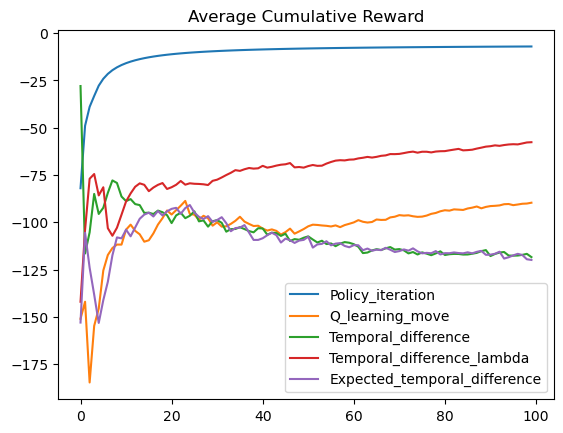

Policy_iteration took 3.3323161602020264 seconds
Q_learning_move took 2.509326219558716 seconds
Temporal_difference took 3.3313612937927246 seconds
Temporal_difference_lambda took 0.8518495559692383 seconds
Expected_temporal_difference took 1.544748067855835 seconds


In [3]:
a_env = Board()
a_p = Piece(piece='king')
b_env = Board()
b_p = Piece(piece='king')
c_env = Board()
c_p = Piece(piece='king')
d_env = Board()
d_p = Piece(piece='king')
e_env = Board()
e_p = Piece(piece='king')
f_env = Board()
f_p = Piece(piece='king')

algorithms = [
    Policy_iteration(agent=f_p, env=f_env),
    Q_learning_move(env=a_env, agent=a_p),
    Temporal_difference(agent=b_p, env=b_env),
    Temporal_difference_lambda(agent=c_p, env=c_env),
    Expected_temporal_difference(agent=e_p, env=e_env),
    
]

results = []
n_of_episodes = 100

for algorithm in tqdm(algorithms):
    
    start_time = time.time()
    rewards = []
    if type(algorithm).__name__ != 'Policy_iteration':
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(episode)  # this function should return the total reward for the episode
            rewards.append(reward)
    
    else:
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(n_of_episodes)
        rewards = reward
    
    end_time = time.time()
    
    results.append({
        'name': type(algorithm).__name__,
        'rewards': rewards,
        'time': end_time - start_time,
    })

#     print(len(rewards))

# print(results)

# Plot average cumulative reward
for result in results:
    plt.plot(np.cumsum(result['rewards']) / np.arange(1, n_of_episodes+1), label=result['name'])
plt.legend()
plt.title('Average Cumulative Reward')
plt.show()

# Print time taken
for result in results:
    print(f"{result['name']} took {result['time']} seconds")

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:46<00:00,  6.69s/it]


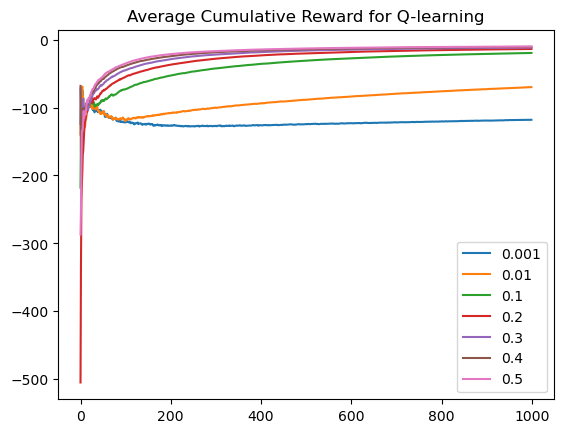

In [6]:

n_of_episodes = 1000
results = []

# for g in tqdm([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
for alpha in tqdm([0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]):
# for g in [0.9]:
    rewards = []
    env = Board()
    p = Piece(piece='king')  # king", "rook", "bishop" or "knight"
    # q = Q_learning_move(agent=p, env=env)
    td = Q_learning_move(p, env)
    
    for episode in range(n_of_episodes):
        reward = td.run_episode(episode, alpha=alpha)  # this function should return the total reward for the episode
        rewards.append(reward)

    results.append({
        'name': alpha,
        'rewards': rewards
    })

# Plot average cumulative reward
for result in results:
    plt.plot(np.cumsum(result['rewards']) / np.arange(1, n_of_episodes+1), label=result['name'])
plt.legend()
plt.title('Average Cumulative Reward for Q-learning')
plt.show()

100%|██████████| 4/4 [00:07<00:00,  1.95s/it]


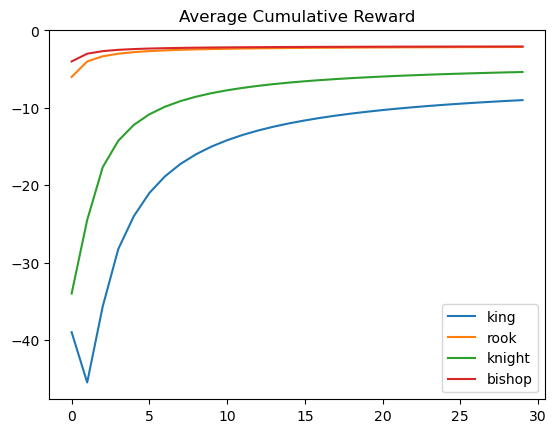

king took 1.0368101596832275 seconds
rook took 2.409323215484619 seconds
knight took 0.9789693355560303 seconds
bishop took 3.3712995052337646 seconds


In [4]:
a_env = Board()
a_p = Piece(piece='king')
b_env = Board()
b_p = Piece(piece='rook')
c_env = Board()
c_p = Piece(piece='knight')
d_env = Board()
d_p = Piece(piece='bishop')
e_env = Board()


algorithms = [
    Policy_iteration(env=a_env, agent=a_p),
    Policy_iteration(agent=b_p, env=b_env),
    Policy_iteration(agent=c_p, env=c_env),
    Policy_iteration(agent=d_p, env=d_env)
]

results = []
n_of_episodes = 30

for algorithm in tqdm(algorithms):
    
    start_time = time.time()
    rewards = []
    if type(algorithm).__name__ != 'Policy_iteration':
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(episode)  # this function should return the total reward for the episode
            rewards.append(reward)
    
    else:
        for episode in range(n_of_episodes):
            reward = algorithm.run_episode(n_of_episodes)
        rewards = reward
    
    end_time = time.time()
    
    results.append({
        'name': algorithm.agent.piece,
        'rewards': rewards,
        'time': end_time - start_time,
    })

#     print(len(rewards))

# print(results)

# Plot average cumulative reward
for result in results:
    plt.plot(np.cumsum(result['rewards']) / np.arange(1, n_of_episodes+1), label=result['name'])
plt.legend()
plt.title('Average Cumulative Reward')
plt.show()

# Print time taken
for result in results:
    print(f"{result['name']} took {result['time']} seconds")